<a href="https://colab.research.google.com/github/Haile143/Portu_bank_Logistic_Regessesion/blob/main/Portu_bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

# Reading Dataset

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/portu_banking_final.csv')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# Checking information about Data

In [3]:
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [5]:
print("Dimension of dataset:", dataset.shape)
print("Number of rows in the dataset:", dataset.shape[0])
print("Number of columns in the dataset:", dataset.shape[1])

Dimension of dataset: (41188, 21)
Number of rows in the dataset: 41188
Number of columns in the dataset: 21


In [6]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
X = dataset.iloc[:, :-1]
display(X)

# y = target values, only the species column
y = dataset.iloc[:, -1]
display(y)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5


0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [9]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# Data Preprocessing

In [10]:
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [11]:
dataset['age']=dataset['age'].replace({'35-30':32,'30-35':32,'25-30':27,'18-25':23,'30-32':31,'50-55':53,'45-50':47,'20-25':23,'20-40':30,'35-40':38,'30-40':35})

In [12]:
#dataset['age']=dataset['age'].replace(['35-30'],32)
#dataset['age']=dataset['age'].replace(['30-35'],32)

In [13]:
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 32, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 27, '62', '75', '21', '82', '77', 23, 31, '70',
       53, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 47, 30, 38,
       '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 37, 22, 45,
       24, 50, 58, 33, 28, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 48, 46,
       67, 34, 54, 40, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

In [14]:
dataset['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [15]:
dataset['job']=dataset['job'].replace(['student'],'STUDENT')

In [16]:
dataset['job']=dataset['job'].replace({'blue-collar':'BLUE-COLLAR','technician':'TECHNICIAN','management':'MANAGEMENT'
,'services':'SERVICES','retired':'RETIRED','admin.':'ADMIN.', 'housemaid':'HOUSEMAID','unknown':'unemployed','UNKNOWN':'unemployed'})

In [17]:
dataset['job'].unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'SERVICES', 'RETIRED',
       'ADMIN.', 'HOUSEMAID', 'unemployed', 'entrepreneur',
       'self-employed', 'STUDENT'], dtype=object)

In [18]:
dataset['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [19]:
dataset['marital']=dataset['marital'].replace({'D':'divorced','S':'single','unknown':'single','M':'married'})

In [20]:
dataset['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
dataset['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [22]:
dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [23]:
dataset['education']=dataset['education'].replace({'basic.4y':'high.school','basic.9y':'high.school','basic-9y':'high.school',
                                                   'basic-4y':'high.school','unknown':'illiterate','professional.course':'university.degree','basic.6y':'high.school','basic-6y':'high.school'})

In [24]:
dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [25]:
dataset['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [26]:
dataset['default']=dataset['default'].replace({'unknown':'no'})

In [27]:
dataset['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [28]:
dataset['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [29]:
dataset['housing']=dataset['housing'].replace({'unknown':'yes'})

In [30]:
dataset['housing'].unique()

array(['yes', 'no'], dtype=object)

In [31]:
dataset['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [32]:
dataset['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [33]:
dataset['loan']=dataset['loan'].replace({'unknown':'yes'})

### Exploring data with Group by

In [35]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [37]:
obj_cols=dataset.select_dtypes(include='object')
obj_cols.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,44,BLUE-COLLAR,married,high.school,no,yes,no,cellular,aug,thu,nonexistent
1,53,TECHNICIAN,married,illiterate,no,no,no,cellular,nov,fri,nonexistent
2,28,MANAGEMENT,single,university.degree,no,yes,no,cellular,jun,thu,success
3,39,SERVICES,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,55,RETIRED,married,high.school,no,yes,no,cellular,aug,fri,success


# Ploting Data

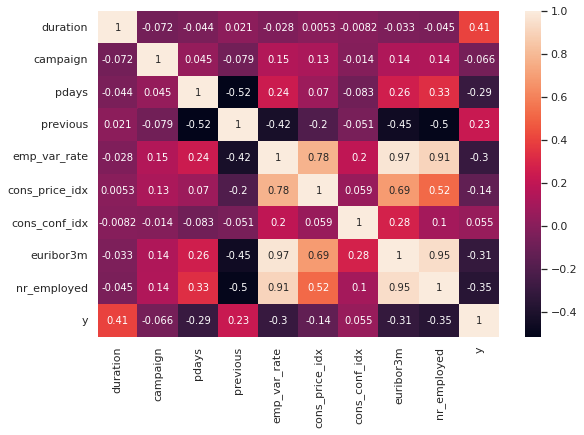

In [38]:
plt.figure(figsize=(9,6))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [39]:
obj_cols.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [40]:
obj_cols.drop(['age','month','day_of_week'],axis=1, inplace=True)

In [41]:
df=dataset
for m in obj_cols:
  dummies=pd.get_dummies(dataset[m],drop_first=True)
  df=pd.concat([df,dummies],axis='columns')

In [43]:
df.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1,inplace=True)

In [44]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'BLUE-COLLAR', 'HOUSEMAID', 'MANAGEMENT', 'RETIRED', 'SERVICES',
       'STUDENT', 'TECHNICIAN', 'entrepreneur', 'self-employed', 'unemployed',
       'married', 'single', 'illiterate', 'university.degree', 'yes', 'yes',
       'yes', 'telephone', 'nonexistent', 'success'],
      dtype='object')

In [45]:
x=df.iloc[:,:-1]
display(x)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,unemployed,married,single,illiterate,university.degree,yes,yes,yes,telephone,nonexistent
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,1,0,0,0,0,1,0,0,1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,1,0,0,0,0,0,1
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,1,0,1,0,1,0,0,0
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,0,0,0,0,0,1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,1,0,0,0,0,0,1,1,1
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,1,0,0,0,0,0,0,1,1
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,1,0,1,1,1,1
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,1,0,0,1,0,0,1,1,1


In [46]:
y=df.iloc[:,-1]
display(y)

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: success, Length: 41188, dtype: uint8

# Spliting Data

In [47]:
import imblearn

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


# Creating Model

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=0)
lr.fit(x_train,y_train)

LogisticRegression()

# Checking Score

In [50]:
lr.score(x_train,y_train)

0.9970864946889226

In [51]:
lr.score(x_test,y_test)

0.9974508375819373

In [52]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7962
           1       0.94      0.99      0.96       276

    accuracy                           1.00      8238
   macro avg       0.97      0.99      0.98      8238
weighted avg       1.00      1.00      1.00      8238



In [55]:
print(accuracy_score(y_test,pred)*100)

99.74508375819373


In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[7944   18]
 [   3  273]]


# Balancing Data
### By Seeing the result of our model we can understand that our dataset is not balanced. "Support: for 0 it is 7962 , for 1 it is 276 "

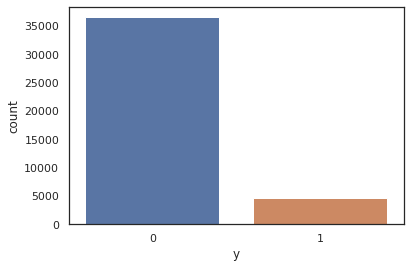

In [57]:
sns.countplot(dataset['y'])

In [58]:
X = dataset.drop(['y'],axis=1)
y = dataset['y']

In [59]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
#x_train_s, y_train_s = sm.fit_resample(x_train,y_train)
sm = SMOTE()
x, y = sm.fit_resample(x.values, y.ravel())



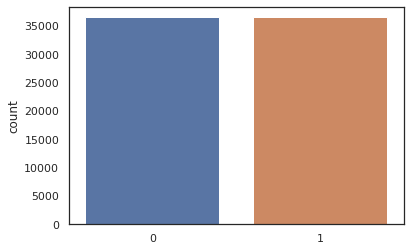

In [60]:
sns.countplot(y)

# Spliting Balanced Data into train and test

In [61]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size= 0.20,random_state= 42)

# Feeding Model

In [62]:
LR = LogisticRegression(verbose=1)
LR.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(verbose=1)

# Checking Score

In [63]:
prediction = LR.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[7084,  282],
       [   1, 7253]])

In [67]:
print("Accuracy Is: ",round(accuracy_score(y_test,prediction)*100,2))

Accuracy Is:  98.06


In [69]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7366
           1       0.96      1.00      0.98      7254

    accuracy                           0.98     14620
   macro avg       0.98      0.98      0.98     14620
weighted avg       0.98      0.98      0.98     14620

